In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

In [2]:
# Model-specific imports:
from sklearn.neural_network import MLPClassifier

In [3]:
inputData = pd.read_csv(r'/Users/harshilkalsi/Downloads/CTG1.csv').sample(frac = 1)

inputData.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,NSP
1607,133,6,44,3,64,2.0,0,4.5,1,0,0,1
1887,141,4,0,8,58,0.6,0,7.9,0,0,0,1
771,130,0,1,0,78,0.2,84,2.0,1,0,0,3
232,123,2,3,0,55,0.7,0,8.6,0,0,0,1
17,131,1,251,2,18,2.4,0,13.9,3,0,1,2


In [4]:
# # select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['NSP', 'DS', 'DP', 'DL'])
y = inputData['NSP']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature 0: 34.817455
Feature 1: 212.891330
Feature 2: 8.749861
Feature 3: 47.414037
Feature 4: 502.623935
Feature 5: 17.433022
Feature 6: 397.704045
Feature 7: 94.498388


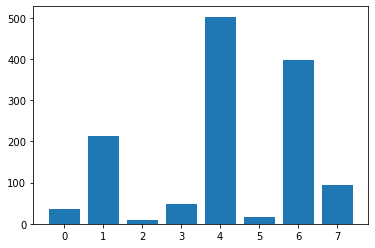

In [5]:
# feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as pyplot
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [6]:
inputData.corr()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,NSP
LB,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,-0.053518,-0.117133,0.148151
AC,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,-0.128901,-0.011350,-0.039341,-0.110317,-0.340394
FM,-0.033305,0.053956,1.000000,-0.036626,-0.116461,0.138061,-0.072214,0.021031,0.076283,-0.010328,0.205337,0.060366
UC,-0.127722,0.212100,-0.036626,1.000000,-0.079651,0.232687,-0.247513,-0.106590,0.339484,0.018405,0.152395,-0.163295
ASTV,0.305570,-0.197985,-0.116461,-0.079651,1.000000,-0.430705,0.459413,-0.315105,-0.037040,0.033949,0.053677,0.471191
MSTV,-0.279607,0.191378,0.138061,0.232687,-0.430705,1.000000,-0.470259,0.073892,0.516901,0.034130,0.287548,-0.103382
ALTV,0.285630,-0.345162,-0.072214,-0.247513,0.459413,-0.470259,1.000000,-0.171114,-0.266298,-0.030770,-0.140133,0.426146
MLTV,-0.032091,-0.128901,0.021031,-0.106590,-0.315105,0.073892,-0.171114,1.000000,-0.251442,-0.037667,-0.230849,-0.226797
DL,-0.155908,-0.011350,0.076283,0.339484,-0.037040,0.516901,-0.266298,-0.251442,1.000000,0.121617,0.294068,0.065328
DS,-0.053518,-0.039341,-0.010328,0.018405,0.033949,0.034130,-0.030770,-0.037667,0.121617,1.000000,0.019766,0.131934


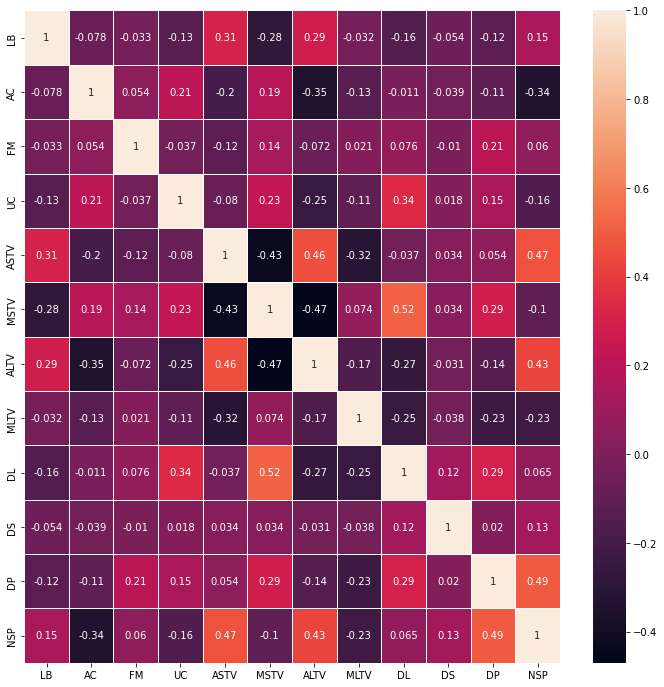

In [7]:
fig, axes = plt.subplots(figsize=(12, 12)) 
sns.heatmap(data=inputData.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

In [8]:
# dropping features in input data according to heat map
X = inputData.drop(columns=['NSP','UC', 'MLTV','MSTV'])
y = inputData['NSP']


# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# instantiate a linear regression model using sklearn:
# MPclf = MLPClassifier(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)
MLPclf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

# fit the model to the training data
MLPclf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [10]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(MLPclf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.778 (0.001)


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 92.3% of the points

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points

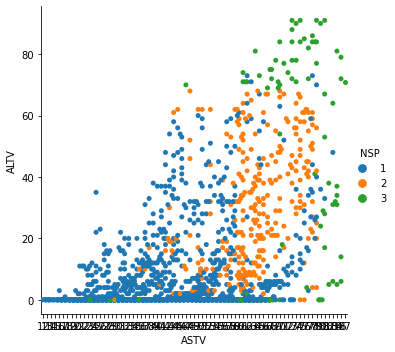

In [11]:
# check the model's performance on unseen, test data
predictions = MLPclf.predict(X_test)

sns.catplot(data=inputData, kind='swarm', x="ASTV", y="ALTV", hue="NSP")